# Introduction
Customer churn occurs when __customers__ or __subscribers__ stop doing business with a company or service, also known as __customer attrition__. It is also referred as loss of clients or customers. One industry in which churn rates are particularly useful is the telecommunications industry, because most customers have multiple options from which to choose within a geographic location.

In [1]:
import numpy as np 
import pandas as pd 
import eli5
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance

# command for work offline
plotly.offline.init_notebook_mode(connected=True)

In [2]:
# read the dataset
#dataset = pd.read_csv("../input/datacustomerchurn/datachurn.csv")
dataset = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# an overview of the dataset
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.shape

(7043, 21)

In [5]:
# list of columns in the dataset
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Dataset Description
This dataset contains `7043` observations and `21` features and 1 label (`Churn`)

| __Feature Name__ | __Description__ | __Data Type__ |
| - | - | - |
| customerID | Contains customer ID | categorical | 
| gender | whether the customer female or male | categorical |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) | numeric, int |
| Partner | Whether the customer has a partner or not (Yes, No) | categorical |
| Dependents | Whether the customer has dependents or not (Yes, No) | categorical | 
| tenure | Number of months the customer has stayed with the company | numeric, int |
| PhoneService | Whether the customer has a phone service or not (Yes, No) | categorical |
| MultipleLines | Whether the customer has multiple lines r not (Yes, No, No phone service) | categorical |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) | categorical |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) | categorical | 
| OnlineBackup |  Whether the customer has online backup or not (Yes, No, No internet service) | categorical | 
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) | categorical |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) | categorical | 
| streamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) | categorical |
| streamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) | categorical |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) | categorical |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) | categorical |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card) | categorical |
| MonthlyCharges | The amount charged to the customer monthly  |  numeric , int |
| TotalCharges | The total amount charged to the customer  | object |
| Churn | Whether the customer churned or not (Yes or No) | categorical |

## Statistical Summary of the Dataset
[DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding `NaN` values. This method tells us a lot of things about a dataset. One important thing is that the `describe()` method deals only with `numeric` values. It doesn't work with or show any statistics on `categorical` values.

In [6]:
# only 3 feature contain numerical values, rest are categorical feature
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Preprocessing

In [7]:
# customer id is unnecessary
del dataset["customerID"]

### Encoding
* Binary Encoding
* One Hot Encoding

In [8]:
gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

dataset["gender"] = dataset["gender"].map(gender_map)

def binary_encode(features):
    for feature in features:
        dataset[feature] = dataset[feature].map(yes_no_map)

### Apply binary encoding on categorical features that contains only two categories

In [9]:
binary_encode_candidate = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
binary_encode(binary_encode_candidate)

In [10]:
# converting series object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors = 'coerce')

In [11]:
# missing values check
print(dataset.isnull().any())
print("\n# of Null values in 'TotalCharges`: ",dataset["TotalCharges"].isnull().sum())

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

# of Null values in 'TotalCharges`:  11


In [12]:
# fill null values with the mean values of that feature
dataset["TotalCharges"].fillna(dataset["TotalCharges"].mean(), inplace=True)

### Apply One Hot Encoding on categorical features that containg more than two categories

In [13]:
dataset = pd.get_dummies(dataset)

In [14]:
# now take a look at our final dataset
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


## Feature Selection
__Applying $chi^2$ test and select only top 20 highest $chi^2$ weighted feature__

In [16]:
result = pd.DataFrame(columns=["Features", "Chi2Weights"])

for i in range(len(dataset.columns)):
    chi2, p = chisquare(dataset[dataset.columns[i]])
    result = result.append([pd.Series([dataset.columns[i], chi2], index = result.columns)], ignore_index=True)

In [17]:
result = result.sort_values(by="Chi2Weights", ascending=False)

In [18]:
result.head(20)

,Features,Chi2Weights
8,TotalCharges,1.582229e+07
4,tenure,1.312128e+05
7,MonthlyCharges,9.845178e+04
11,MultipleLines_No phone service,6.361000e+03
1,SeniorCitizen,5.901000e+03
35,Contract_One year,5.570000e+03
38,PaymentMethod_Credit card (automatic),5.521000e+03
20,OnlineBackup_No internet service,5.517000e+03
15,InternetService_No,5.517000e+03
32,StreamingMovies_No internet service,5.517000e+03


In [19]:
new_df = dataset[result["Features"].head(20)]

In [20]:
new_df.head()

,TotalCharges,tenure,MonthlyCharges,MultipleLines_No phone service,SeniorCitizen,Contract_One year,PaymentMethod_Credit card (automatic),OnlineBackup_No internet service,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,DeviceProtection_No internet service,OnlineSecurity_No internet service,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,Contract_Two year,Churn,OnlineSecurity_Yes,TechSupport_Yes
0,29.85,1,29.85,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1889.50,34,56.95,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,108.15,2,53.85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,1840.75,45,42.30,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,151.65,2,70.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Finding Correlation

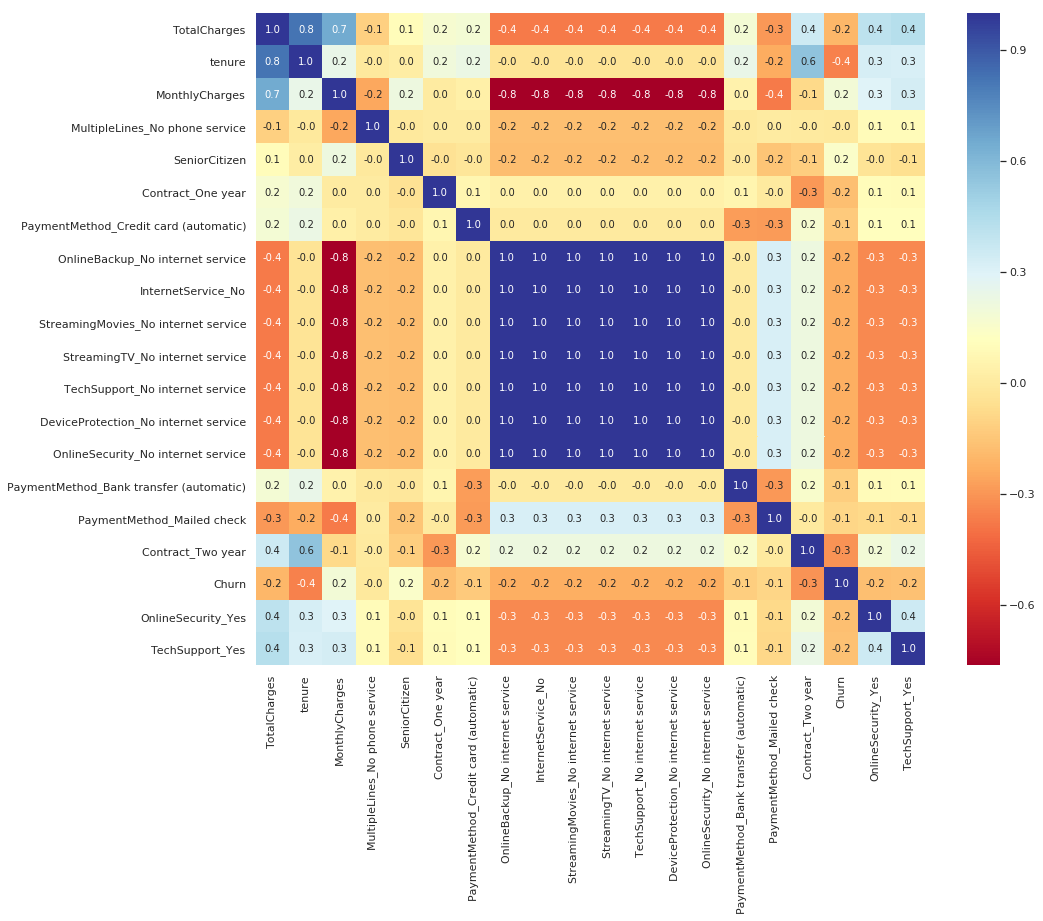

In [21]:
plt.figure(figsize = (15, 12))
sns.heatmap(new_df.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

In [22]:
hightly_corr_feature = ["OnlineBackup_No internet service", "StreamingMovies_No internet service", "StreamingTV_No internet service", 
"TechSupport_No internet service", "DeviceProtection_No internet service", "OnlineSecurity_No internet service"]

def remove_corr_features(features):
    for feature in features:
        del new_df[feature]

In [23]:
remove_corr_features(hightly_corr_feature)

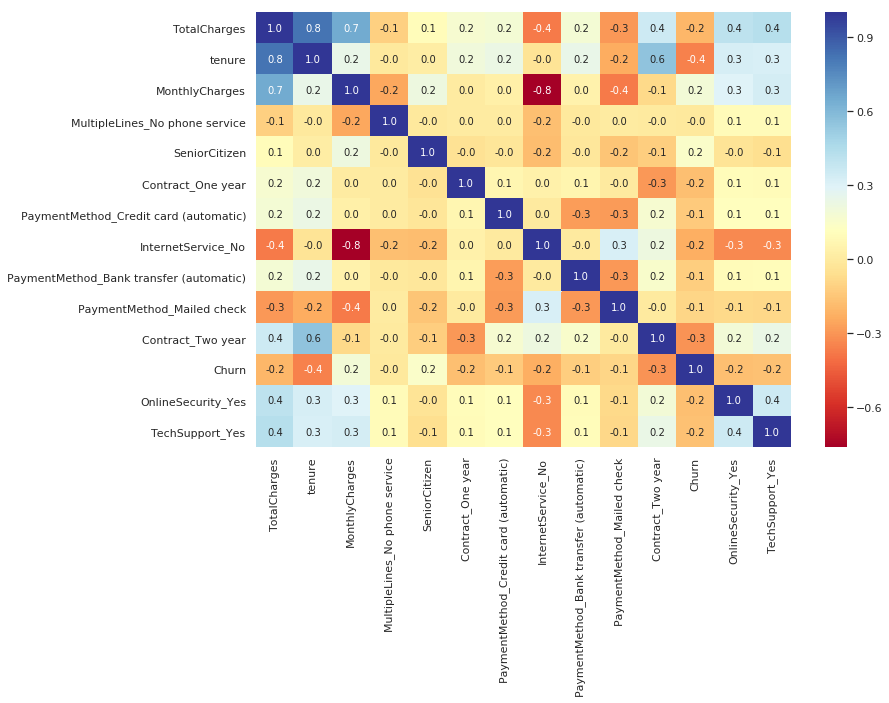

In [24]:
plt.figure(figsize = (12, 8))
sns.heatmap(new_df.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

### Boxplot For Outlier Detection

In [25]:
trace = []

def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
        
gen_boxplot(new_df)

In [26]:
data = trace
plotly.offline.iplot(data)

> __Note: you can interect with the boxplot. So play around with it. Double click to back on initial state. __


__This plot is generated by using `plotly`. I have one interactive tutorial on `plotly`, you may visit those kernel:__

* [Gettring started with Plotly (Part 1)](https://www.kaggle.com/nasirislamsujan/getting-started-with-plotly-part-1)

## Data Visualization

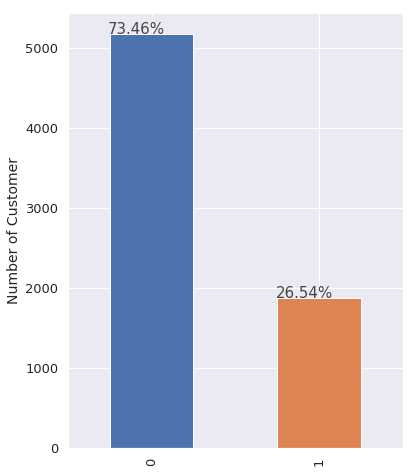

In [27]:
ax = new_df["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

In [28]:
new_df.columns

Index(['TotalCharges', 'tenure', 'MonthlyCharges',
       'MultipleLines_No phone service', 'SeniorCitizen', 'Contract_One year',
       'PaymentMethod_Credit card (automatic)', 'InternetService_No',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'Contract_Two year', 'Churn', 'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [29]:
new_df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

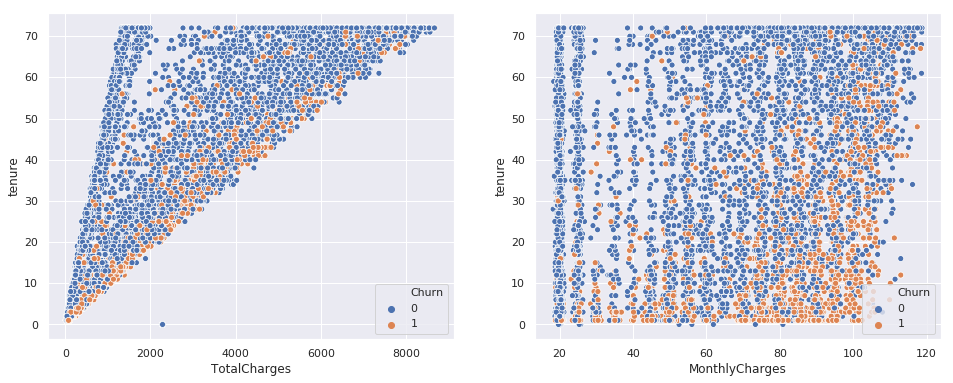

In [30]:
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=new_df, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=new_df, ax=ax[1])

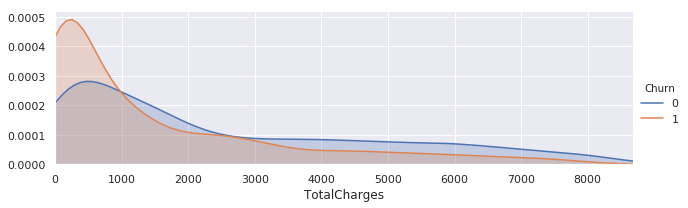

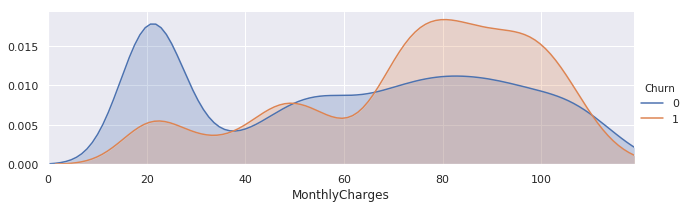

In [31]:
facet = sns.FacetGrid(new_df, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"TotalCharges",shade= True)
facet.set(xlim=(0, new_df["TotalCharges"].max()))
facet.add_legend()

facet = sns.FacetGrid(new_df, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"MonthlyCharges",shade= True)
facet.set(xlim=(0, new_df["MonthlyCharges"].max()))
facet.add_legend()

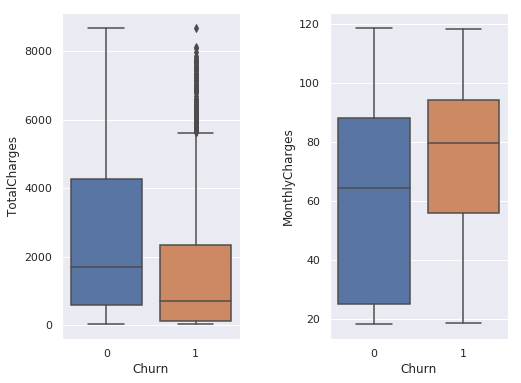

In [32]:
_, ax = plt.subplots(1, 2, figsize= (8, 6))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = 'Churn',  y = 'TotalCharges', data = new_df, ax=ax[0])
sns.boxplot(x = 'Churn',  y = 'MonthlyCharges', data = new_df, ax=ax[1])

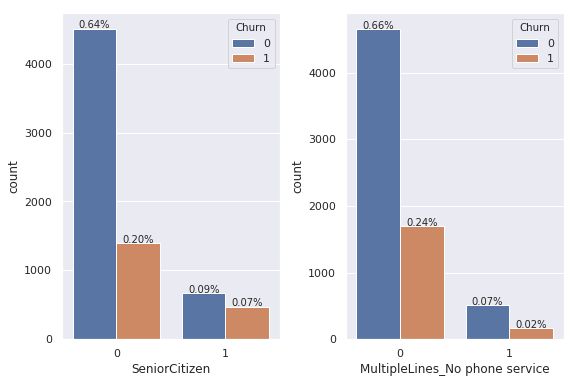

In [33]:
_, axs = plt.subplots(1, 2, figsize=(9, 6))
plt.subplots_adjust(wspace = 0.3)
ax = sns.countplot(data = new_df, x = "SeniorCitizen", hue = "Churn", ax = axs[0])
ax1 = sns.countplot(data = new_df, x = "MultipleLines_No phone service", hue = "Churn", ax = axs[1])

for p in ax.patches:
        height = p.get_height() 
        ax.text(
                p.get_x()+p.get_width()/2,
                height + 3.4,
                "{:1.2f}%".format(height/len(new_df),0),
                ha = "center", rotation = 0
               ) 
        
for p in ax1.patches:
        height = p.get_height() 
        ax1.text(
                p.get_x()+p.get_width()/2,
                height + 3.4,
                "{:1.2f}%".format(height/len(new_df),0),
                ha = "center", rotation = 0
               ) 

> **Senior Citizens customer are trends to Churn more than other**

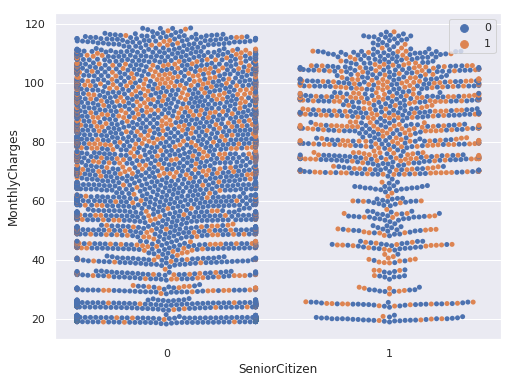

In [34]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x = 'SeniorCitizen', y = 'MonthlyCharges', hue="Churn", data = new_df)
plt.legend(loc='upper-right')

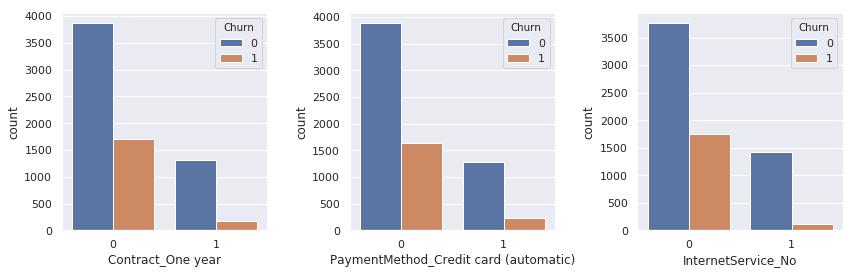

In [35]:
fig, ax = plt.subplots(1,3, figsize=(14, 4))
plt.subplots_adjust(wspace=0.4)
sns.countplot(x = "Contract_One year", hue="Churn" , ax=ax[0], data=new_df)
sns.countplot(data = new_df, x = "PaymentMethod_Credit card (automatic)", ax=ax[1], hue="Churn")
sns.countplot(data = new_df, x ="InternetService_No", ax=ax[2], hue="Churn")
fig.show()

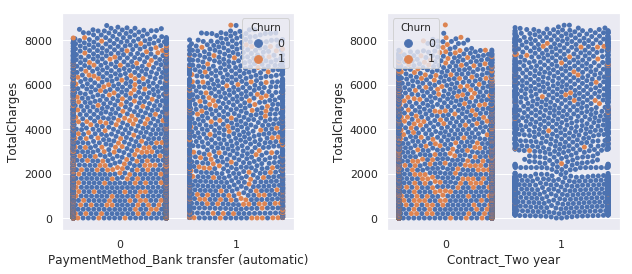

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)
sns.swarmplot(x = 'PaymentMethod_Bank transfer (automatic)', y = 'TotalCharges', hue="Churn", data = new_df, ax=ax[0])
sns.swarmplot(x = 'Contract_Two year', y = 'TotalCharges', hue="Churn", data = new_df, ax=ax[1])

> Customer with **less than 2 years** contract are more often churn

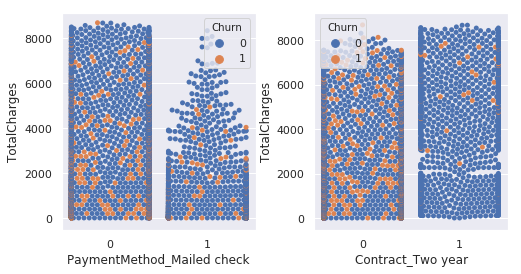

In [37]:
fig, ax = plt.subplots(1,2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = 'PaymentMethod_Mailed check', y = 'TotalCharges', hue="Churn", data = new_df, ax=ax[0])
sns.swarmplot(x = 'Contract_Two year', y = 'TotalCharges', hue="Churn", data = new_df, ax=ax[1])
fig.show()

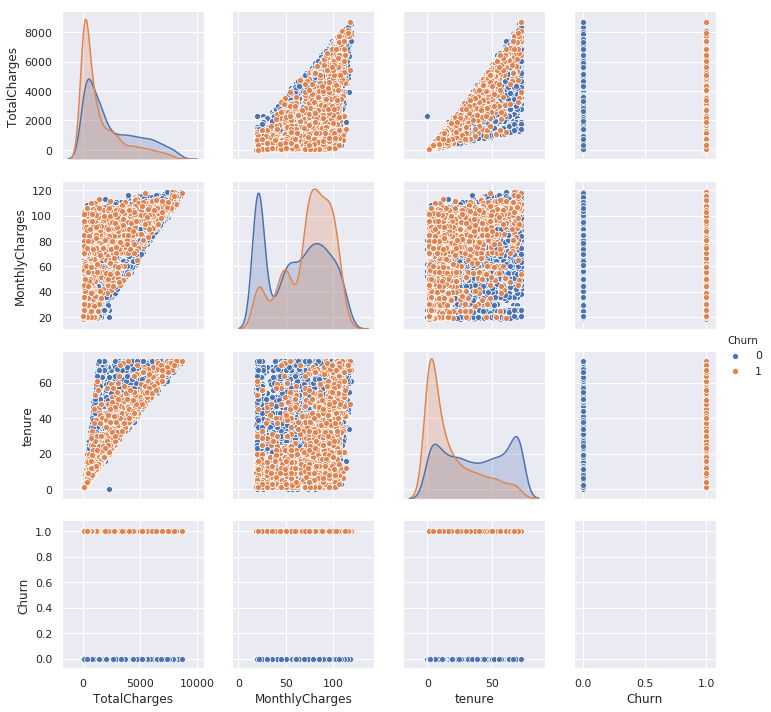

In [38]:
cols = ["TotalCharges", "MonthlyCharges", "tenure", "Churn"] 
pairplot_feature = new_df[cols]
sns.pairplot(pairplot_feature, hue = "Churn")

In [39]:
X = new_df.drop("Churn", axis=1)
y = new_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

In [40]:
perm = PermutationImportance(clf, random_state = 1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0350 ± 0.0101,tenure
0.0326 ± 0.0143,MonthlyCharges
0.0252 ± 0.0105,TotalCharges
0.0194 ± 0.0053,Contract_One year
0.0154 ± 0.0059,PaymentMethod_Bank transfer (automatic)
0.0150 ± 0.0070,TechSupport_Yes
0.0083 ± 0.0086,InternetService_No
0.0083 ± 0.0098,SeniorCitizen
0.0069 ± 0.0023,Contract_Two year
0.0031 ± 0.0103,OnlineSecurity_Yes


> ** Darker green represent the `highest impact` and lesser green represent the `less impact` feature **

### That's it for this Kernel. 